In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import statistics as stat

In [3]:
salary = "./ds_salaries.csv"
salary_df=pd.read_csv(salary)
salary_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
#Counting Rows and Columns in dataset
Rows = len(salary_df.axes[0])
Columns = len(salary_df.axes[1])

#print(f"Total Rows : {Rows},  Total Columns : {Columns}")

In [5]:
Summary_df = salary_df.info()
#Summary_df
#salary_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [6]:
#Checking for Null/Empty values in the dataset
no_entry_cell = salary_df.isnull().sum()
no_entry_cell

#No empty cell was found in the dataset. 

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
#Find duplicate rows
duplicate_rows = salary_df[salary_df.duplicated()]
#Remove duplicate rows
salary_df = salary_df.drop_duplicates()
salary_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [8]:
#Value counting for each columns for unique entries
value_counts = {column: salary_df[column].value_counts() for column in salary_df.columns}
value_counts

{'work_year': work_year
 2023    1156
 2022    1125
 2021     228
 2020      75
 Name: count, dtype: int64,
 'experience_level': experience_level
 SE    1554
 MI     664
 EN     270
 EX      96
 Name: count, dtype: int64,
 'employment_type': employment_type
 FT    2547
 PT      17
 CT      10
 FL      10
 Name: count, dtype: int64,
 'job_title': job_title
 Data Engineer                598
 Data Scientist               538
 Data Analyst                 396
 Machine Learning Engineer    206
 Analytics Engineer            91
                             ... 
 Compliance Data Analyst        1
 Deep Learning Researcher       1
 Staff Data Analyst             1
 Data DevOps Engineer           1
 Finance Data Analyst           1
 Name: count, Length: 93, dtype: int64,
 'salary': salary
 100000    70
 120000    59
 150000    58
 200000    48
 80000     46
           ..
 126277     1
 153088     1
 323300     1
 200160     1
 412000     1
 Name: count, Length: 815, dtype: int64,
 'salary_curren

In [9]:
#Categorical Analysis of Experience Level

Total_Exp_Count=salary_df["experience_level"].value_counts()
Total_Exp_Count

experience_level
SE    1554
MI     664
EN     270
EX      96
Name: count, dtype: int64

Text(0, 0.5, 'Count')

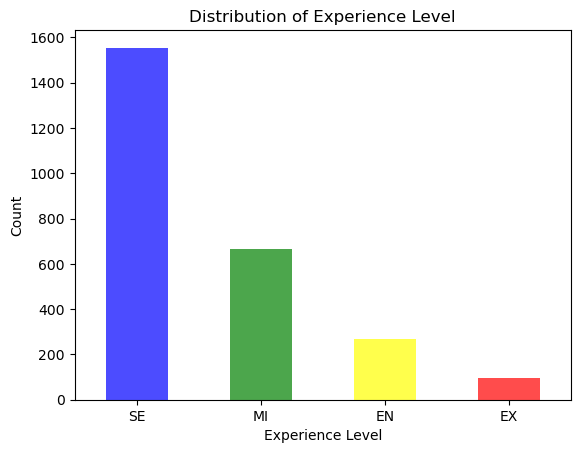

In [10]:
#Creating Plot to show the categorical analysis of Experience_level
color=["blue", "green", "yellow", "red"]
Map1 = Total_Exp_Count.plot(kind="bar", color=color, alpha=0.7)
plt.xticks(rotation="horizontal")
plt.title("Distribution of Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Count")

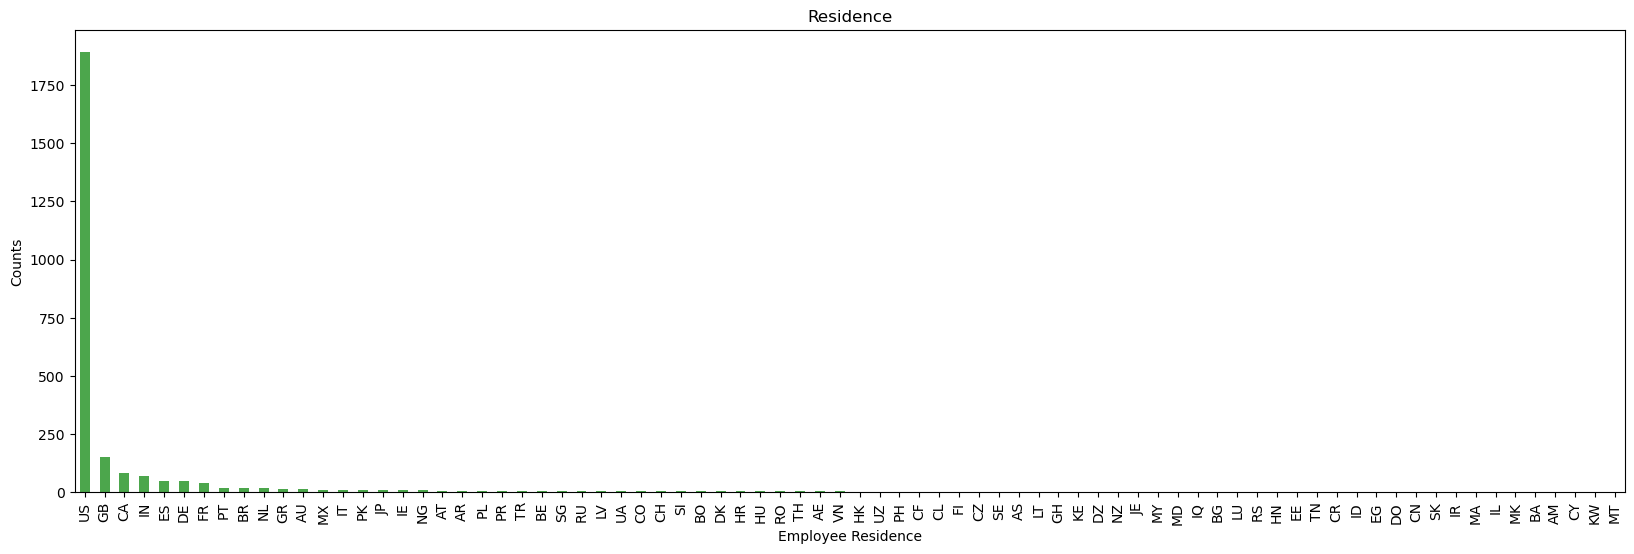

In [18]:
#plot bar chart for Residence of Employee
Emp_Residence =salary_df["employee_residence"].value_counts()

fig = plt.figure(figsize = (20,6))
Emp_Residence.plot(kind="bar", color="green", alpha=0.7)

plt.xlabel("Employee Residence")
plt.ylabel("Counts")
plt.title("Residence")
plt.xticks(rotation=90)
plt.show()

In [124]:
Top20_Resi=salary_df["employee_residence"].value_counts().head(20)
Top20_Resi

employee_residence
US    1893
GB     150
CA      81
IN      70
ES      47
DE      47
FR      37
PT      18
BR      18
NL      15
GR      13
AU      11
MX      10
IT       8
PK       8
JP       7
IE       7
NG       7
AT       6
AR       6
Name: count, dtype: int64

Text(0, 0.5, 'Count')

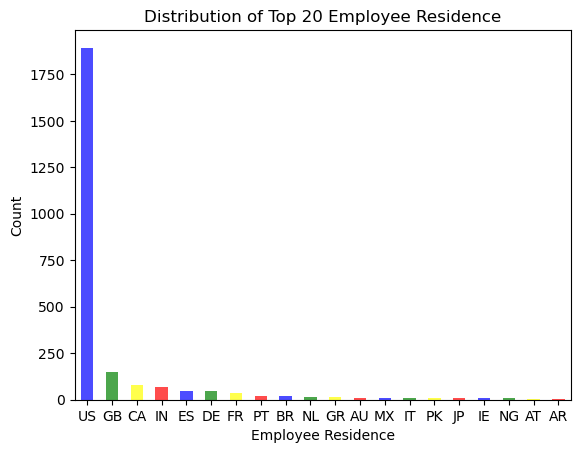

In [125]:
#There are 78 rows unique values for employee residence, so plotting for sample of top 10 employee residence
#top10_employee_res = salary_df["employee_residence"].value_counts().head(10).index
#top10_employee_res
#plt.plot(y=top10_employee_res, kind="bar", color=color, alpha=0.7)

color=["blue", "green", "yellow", "red"]
Map2 = Top20_Resi.plot(kind="bar", color=color, alpha=0.7)
plt.xticks(rotation="horizontal")
plt.title("Distribution of Top 20 Employee Residence")
plt.xlabel("Employee Residence")
plt.ylabel("Count")

In [13]:
#Analysis of Salary vs Employme
Salary_Avg_Emp= salary_df.groupby("employment_type")["salary_in_usd"].mean()
print(Salary_Avg_Emp)
Emp_Types=["FT", "PT", "CT", "FL"]
color=["green", "blue", "yellow", "red"]


employment_type
CT    113446.900000
FL     51807.800000
FT    134434.613271
PT     39533.705882
Name: salary_in_usd, dtype: float64


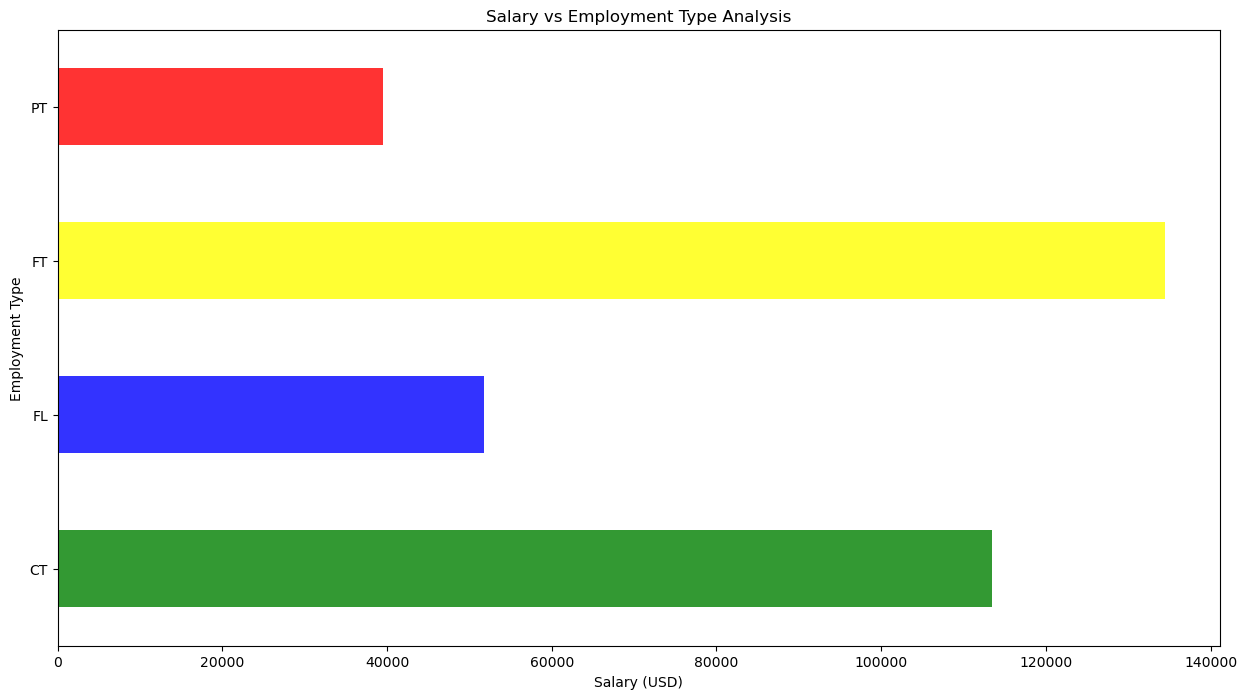

In [14]:
#Plotting bar graph for analysis
Salary_Avg_Emp.plot(kind="barh", color=color, figsize=(15,8), alpha=0.8)
plt.title("Salary vs Employment Type Analysis")
plt.ylabel("Employment Type")
plt.xlabel("Salary (USD)")
plt.show()

C:\Users\tiwar\AppData\Local\Temp\ipykernel_15688\2635436117.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(EN_Top15.index, rotation=90, ha="left")


Text(0, 0.5, 'Counts')

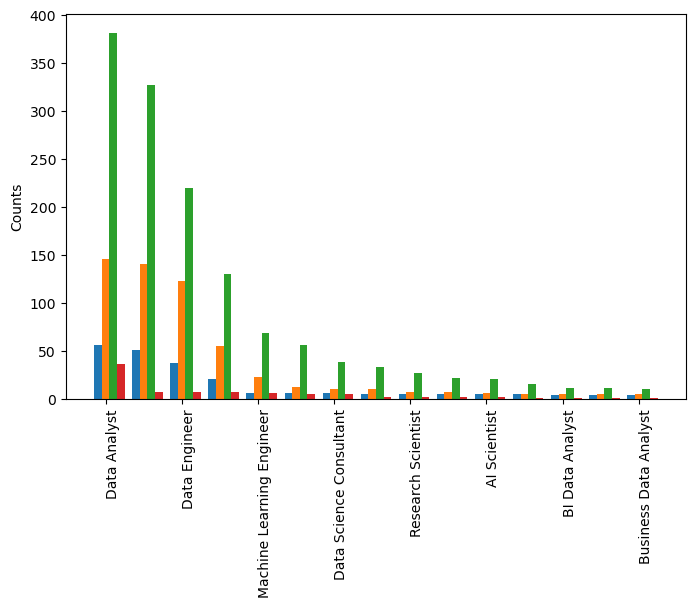

In [17]:
#Experience vs Employment Type
Experience = salary_df.groupby(["experience_level", "job_title"]).size()

EN_Top15=Experience["EN"].sort_values(ascending=False)[:15]
MI_Top15=Experience["MI"].sort_values(ascending=False)[:15]
SE_Top15=Experience["SE"].sort_values(ascending=False)[:15]
EX_Top15=Experience["EX"].sort_values(ascending=False)[:15]
                                
fig, ax=plt.subplots(figsize=(8,5))
bar_width=0.2
bar_positions=range(len(EN_Top15))

ax.bar(
    [pos - bar_width for pos in bar_positions],
    EN_Top15.values,
    width=bar_width,
    label = "EN=EntryLevel"
)
ax.bar(
    bar_positions,
    MI_Top15.values,
    width=bar_width,
    label = "MI=Mid Level"
)
ax.bar(
    [pos + bar_width for pos in bar_positions],
    SE_Top15.values,
    width=bar_width,
    label = "SE=Senior Level"
)
ax.bar(
    [pos + bar_width*2 for pos in bar_positions],
    EX_Top15.values,
    width=bar_width,
    label = "EX=Executive Level"
)

ax.set_xticks=(bar_positions)
ax.set_xticklabels(EN_Top15.index, rotation=90, ha="left")
ax.set_ylabel("Counts")


In [36]:
#Job Titles vs Company size
Jobs_Size_df=salary_df.groupby(["job_title", "company_size"]).size()
Jobs_Size_df= pd.DataFrame(Jobs_Size)
Jobs_Size_df.head()

count
job_title                     work_year experience_level employment_type salary salary_currency salary_in_usd employee_residence remote_ratio company_location company_size       
3D Computer Vision Researcher 2021      EN               FT              20000  USD             20000         AS                 0            AS               M                 1
                                        MI               PT              400000 INR             5409          IN                 50           IN               M                 1
                              2022      EN               FT              50000  USD             50000         US                 100          CR               S                 1
                                        SE               FT              10000  USD             10000         CA                 50           AL               S                 1
AI Developer                  2023      EN               FT              120000 USD             120000        BA                 50           BA               S                 1

In [38]:
data= salary_df[["company_size","job_title"]]
data_df = pd.DataFrame(data)
data_df

,company_size,job_title
0,L,Principal Data Scientist
1,S,ML Engineer
2,S,ML Engineer
3,M,Data Scientist
4,M,Data Scientist
...,...,...
3750,L,Data Scientist
3751,L,Principal Data Scientist
3752,S,Data Scientist
3753,L,Business Data Analyst


In [45]:
group_data=data_df.groupby(["company_size", "job_title"]).value_counts()
group_data

company_size  job_title               
L             AI Developer                2
              AI Programmer               1
              AI Scientist                6
              Analytics Engineer          1
              Applied Data Scientist      6
                                         ..
S             Principal Data Analyst      1
              Principal Data Scientist    1
              Product Data Analyst        1
              Research Engineer           2
              Research Scientist          4
Name: count, Length: 179, dtype: int64

In [117]:
#Country vs Job Listings for top 20 data science roles
Country_df=salary_df.groupby("employee_residence").agg({"salary_in_usd":["mean", "count"]}).reset_index()

Country_df.columns=["Country", "Average Salary", "Job Listings"]

Country_df_Sort=Country_df.sort_values(by="Country", ascending=True)

Country_By_Demand = Country_df.sort_values(by="Job Listings", ascending=False)

Top15_country=Country_By_Demand.head(15)

Top15_country


,Country,Average Salary,Job Listings
75,US,153972.206550,1893
29,GB,87820.906667,150
11,CA,130859.839506,81
39,IN,36543.100000,70
26,ES,62933.531915,47
20,DE,94858.170213,47
28,FR,61734.648649,37
63,PT,53059.000000,18
10,BR,48927.111111,18
57,NL,77483.466667,15


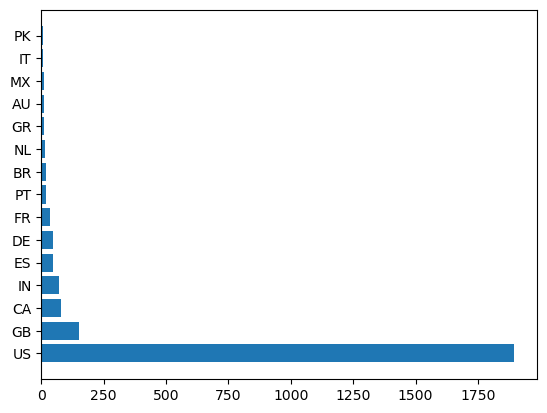

In [126]:
xaxis=Top15_country["Country"]
yaxis=Top15_country["Job Listings"]
plot=plt.barh(xaxis, yaxis)


<Axes: >

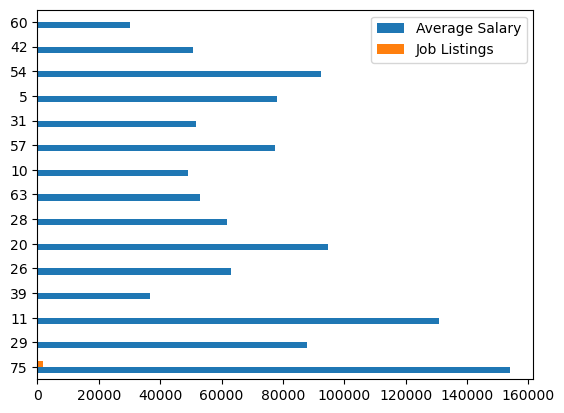

In [79]:
Top15_country.plot(kind="barh")

In [91]:
#Country vs Job Listings for top 20 data science roles
Company_df=salary_df.groupby("company_size").agg({"salary_in_usd":["mean", "count"]}).reset_index()
Company_df.columns=["Company Size", "Average Salary", "Job Listings"]
Company_df_Sort=Company_df.sort_values(by="Company Size", ascending=False)
Company_By_Demand = Company_df.sort_values(by="Job Listings", ascending=False)

Company_By_Demand.head(15)


,Company Size,Average Salary,Job Listings
1,M,141474.514300,2028
0,L,113202.239609,409
2,S,78364.278912,147


Text(0.5, 1.0, 'Job Listing vs. Company Size')

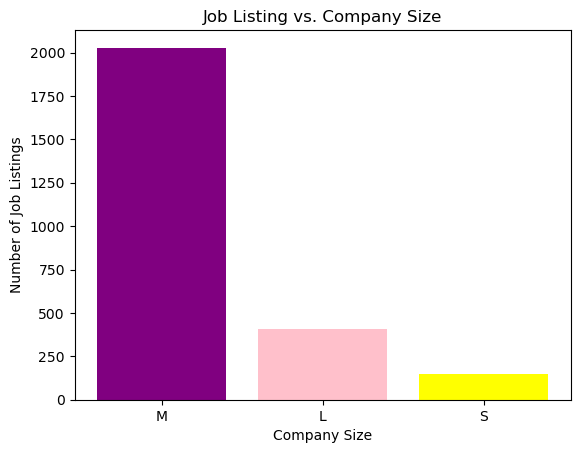

In [100]:
color=["purple", "Pink", "yellow"] 
plt.bar(Company_By_Demand["Company Size"], Company_By_Demand["Job Listings"], color=color)
plt.xlabel("Company Size")
plt.ylabel("Number of Job Listings")
plt.title("Job Listing vs. Company Size")